In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
import itertools
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
poker_hand = fetch_ucirepo(id=158) 
  
# data (as pandas dataframes) 
X = poker_hand.data.features 
y = poker_hand.data.targets 
  
# metadata 
print(poker_hand.metadata) 
  
# variable information 
print(poker_hand.variables) 


{'uci_id': 158, 'name': 'Poker Hand', 'repository_url': 'https://archive.ics.uci.edu/dataset/158/poker+hand', 'data_url': 'https://archive.ics.uci.edu/static/public/158/data.csv', 'abstract': 'Purpose is to predict poker hands', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1025010, 'num_features': 10, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['CLASS'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2002, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5KW38', 'creators': ['Robert Cattral', 'Franz Oppacher'], 'intro_paper': None, 'additional_info': {'summary': 'Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". T

## Poker Hand Dataset

The dataset used in this notebook is the Poker Hand dataset from the UCI Machine Learning Repository. The purpose of this dataset is to predict poker hands. It contains 1,025,010 instances with 10 features representing the suit and rank of five playing cards.

### Quick Exploratory Data Analysis (EDA)

We will start with a quick exploratory data analysis to understand the distribution of the target variable and the features. This will help us gain insights into the dataset before proceeding with model training and evaluation.

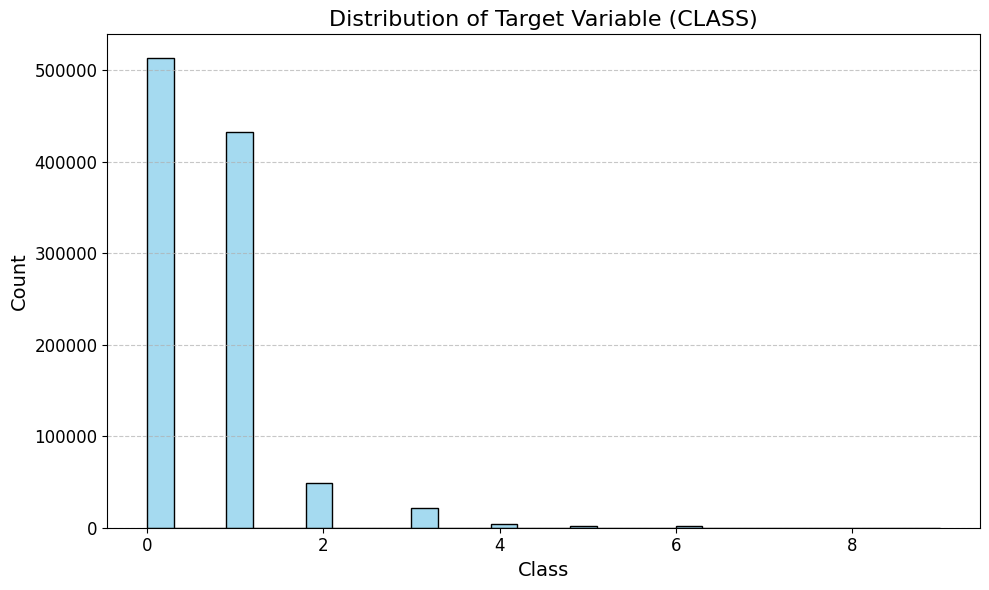

In [14]:
# Plot the distribution of the target variable y
plt.figure(figsize=(10, 6))
sns.histplot(y['CLASS'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable (CLASS)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Percentage Distribution of Poker Hand Values:
CLASS
0        50.116779
1        42.252954
2         4.763661
3         2.110614
4         0.388094
5         0.199998
6         0.142438
7         0.023024
8         0.001659
9         0.000780
Name: proportion, dtype: float64
Distribution of Poker Hand Values:
CLASS
0        513702
1        433097
2         48828
3         21634
4          3978
5          2050
6          1460
7           236
8            17
9             8
Name: count, dtype: int64


ValueError: Names should be list-like for a MultiIndex

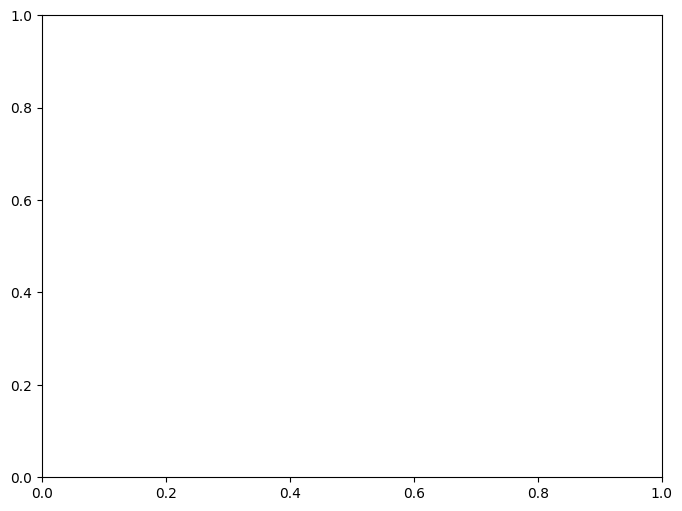

In [8]:
# training_data = pd.read_csv("/Users/ronan/Projet ML/poker+hand/poker-hand-training-true.data")
# testing_data = pd.read_csv("/Users/ronan/Projet ML/poker+hand/poker-hand-testing.data")

# Extract the value_of_hand column from the DataFrame
value_of_hand = y  # Adjust this if your column is named differently

# Create a count of each unique value in the value_of_hand column and normalize to get percentages
value_counts_percentage = value_of_hand.value_counts(normalize=True) * 100
value_counts = value_of_hand.value_counts()

# Print the table with the percentages
print("Percentage Distribution of Poker Hand Values:")
print(value_counts_percentage)

# Print the table in absolute value
print("Distribution of Poker Hand Values:")
print(value_counts)

# Plotting the bar graph with percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts_percentage.index, y=value_counts_percentage.values, palette='viridis')

# Add labels and title
plt.xlabel('Value of Hand')
plt.ylabel('Percentage (%)')
plt.title('Bar Graph of Poker Hand Values (in Percentage)')

# Display the bar graph
plt.show()

Test random forest

In [9]:
#ALREADY DONE

# # Prepare your feature set (X) and labels (y)
# X = training_data.iloc[:, :-1]  # All columns except the last one
# y = training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution in the training set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

# Initialize and fit the Random Forest model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Optional: Check the representation of each hand class in the training set
print("Number of samples per class in the training set:")
print(y_train.value_counts())


Training set class distribution:
CLASS
0        0.501168
1        0.422530
2        0.047636
3        0.021106
4        0.003880
5        0.002000
6        0.001424
7        0.000230
8        0.000017
9        0.000007
Name: proportion, dtype: float64


/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of samples per class in the training set:
CLASS
0        410962
1        346478
2         39062
3         17307
4          3182
5          1640
6          1168
7           189
8            14
9             6
Name: count, dtype: int64


In [10]:
y_pred = model1.predict(X_test)
print(f"Accuracy: {model1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.754851172183686
              precision    recall  f1-score   support

           0       0.78      0.91      0.84    102740
           1       0.72      0.70      0.71     86619
           2       0.64      0.03      0.06      9766
           3       0.85      0.09      0.16      4327
           4       0.45      0.01      0.02       796
           5       0.99      0.19      0.31       410
           6       0.25      0.00      0.01       292
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.75    205002
   macro avg       0.47      0.19      0.21    205002
weighted avg       0.75      0.75      0.73    205002



/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/clovispiedallu/Desktop/DAML_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

The precision is bad because the training set is small(25,000 instances) and the testing set is too large (1,000,000 instances) Let's combine them and redo a distribution between those 2. I think they were inverted in the description of the doc. Let's redo the randomforest by inverting them.

In [31]:
y_pred = model1.predict(X_test)
print(f"Accuracy: {model1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.75255
              precision    recall  f1-score   support

           0       0.78      0.91      0.84    100242
           1       0.72      0.69      0.71     84500
           2       0.65      0.03      0.06      9524
           3       0.84      0.08      0.14      4224
           4       0.56      0.01      0.02       777
           5       1.00      0.19      0.31       399
           6       0.56      0.02      0.03       285
           7       0.00      0.00      0.00        46
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.75    200000
   macro avg       0.51      0.19      0.21    200000
weighted avg       0.75      0.75      0.72    200000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

We get a better precision of 0.75 let's see how we can get a better one. <br><br>
Recall is bad for hands [2:9], let's duplicate all the line with [2:9] 

In [3]:
# Prepare the new dataset

training_data = pd.read_csv("/Users/ronan/Projet ML/poker+hand/poker-hand-testing.data")
testing_data = pd.read_csv("/Users/ronan/Projet ML/poker+hand/poker-hand-training-true.data")

# Filter for hands 2 to 9
hands_to_duplicate = training_data[training_data.iloc[:, -1].isin(range(2, 10))]

# Duplicate the filtered rows
duplicated_hands = pd.concat([hands_to_duplicate] * 1, ignore_index=True)

# Combine the original data with the duplicated rows
new_training_data = pd.concat([training_data, duplicated_hands], ignore_index=True)

In [4]:
# Prepare your feature set (X) and labels (y)
X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution in the training set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

# Initialize and fit the Random Forest model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Optional: Check the representation of each hand class in the training set
print("Number of samples per class in the training set:")
print(y_train.value_counts())

Training set class distribution:
0
0    0.465680
1    0.392549
2    0.088493
3    0.039248
4    0.007219
5    0.003709
6    0.002646
7    0.000427
8    0.000022
9    0.000006
Name: proportion, dtype: float64
Number of samples per class in the training set:
0
0    400966
1    337998
2     76195
3     33794
4      6216
5      3194
6      2278
7       368
8        19
9         5
Name: count, dtype: int64


In [34]:
y_pred = model1.predict(X_test)
print(f"Accuracy: {model1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8222141699069493
              precision    recall  f1-score   support

           0       0.79      0.92      0.85    100242
           1       0.82      0.70      0.76     84500
           2       0.97      0.82      0.89     19049
           3       0.99      0.84      0.91      8448
           4       0.98      0.80      0.88      1554
           5       1.00      0.85      0.92       798
           6       1.00      0.78      0.87       570
           7       1.00      0.83      0.90        92
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1

    accuracy                           0.82    215259
   macro avg       0.95      0.85      0.90    215259
weighted avg       0.83      0.82      0.82    215259



We now have a precision very good for all the classes [2:9]<br><br>

Let's try and give them a little more weight

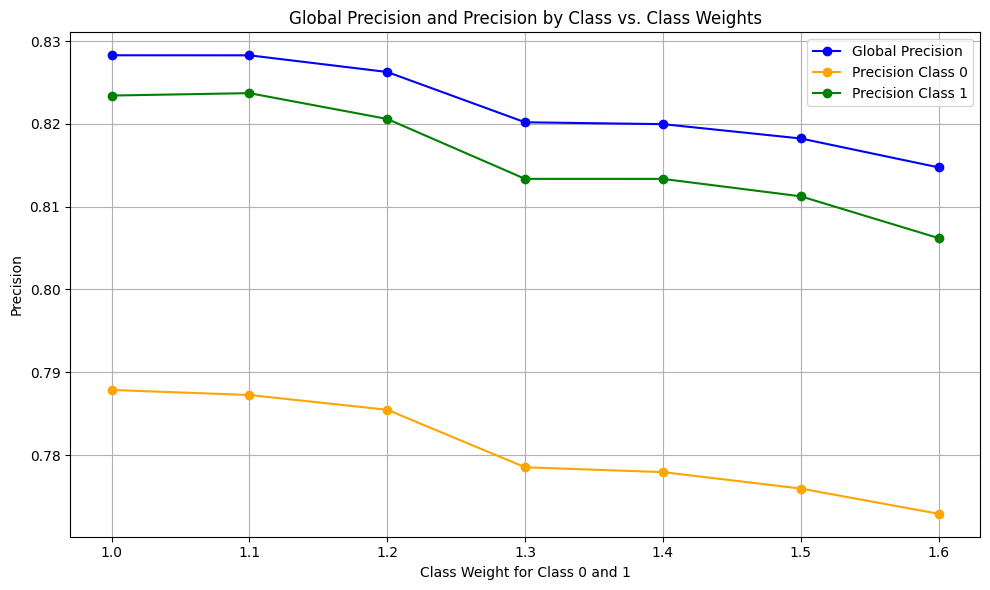

In [42]:
X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Store the results
weights_0_1 = np.arange(1.0, 1.6, 0.1)  # From 1.0 to 1.5
global_precisions = []
class_0_precisions = []
class_1_precisions = []

for weight in weights_0_1:
    # Stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Initialize and fit the Random Forest model with updated class weights
    model1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: weight, 1: weight, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})
    model1.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model1.predict(X_test)

    # Calculate global precision and precision for class 0 and 1
    global_precision = precision_score(y_test, y_pred, average='weighted')
    class_0_precision = precision_score(y_test, y_pred, labels=[0], average='macro')
    class_1_precision = precision_score(y_test, y_pred, labels=[1], average='macro')

    # Append results
    global_precisions.append(global_precision)
    class_0_precisions.append(class_0_precision)
    class_1_precisions.append(class_1_precision)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(weights_0_1, global_precisions, marker='o', label='Global Precision', color='blue')
plt.plot(weights_0_1, class_0_precisions, marker='o', label='Precision Class 0', color='orange')
plt.plot(weights_0_1, class_1_precisions, marker='o', label='Precision Class 1', color='green')

# Formatting the plot
plt.title('Global Precision and Precision by Class vs. Class Weights')
plt.xlabel('Class Weight for Class 0 and 1')
plt.ylabel('Precision')
plt.xticks(weights_0_1)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

We can see that both global precision and precision class 0 and 1 are going down meaning that weighting more class 0 and 1 won't give more precision, this is not the correct way to go.
<br><br>
Let's try to tune the hyperparameter.

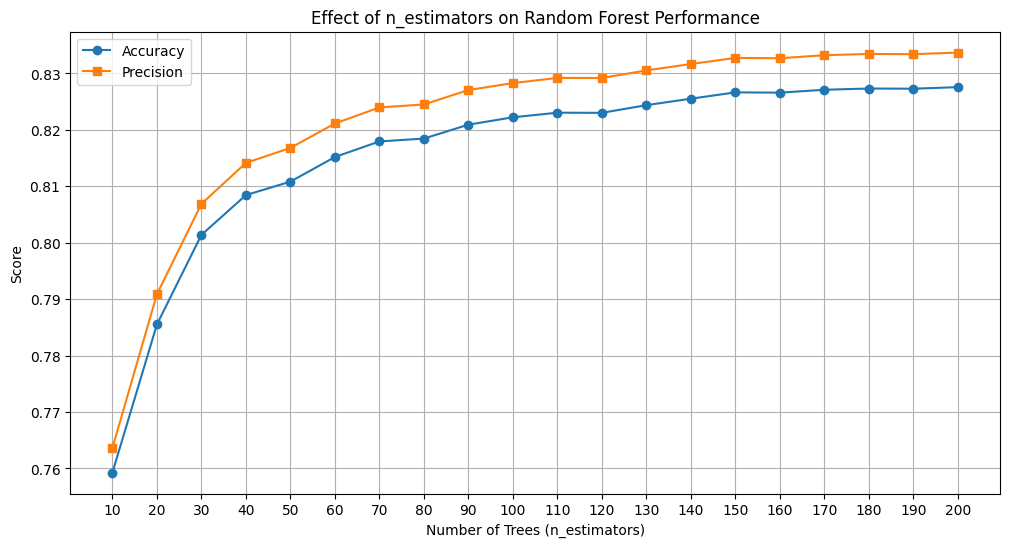

In [6]:
# Evaluation of n_estimators

X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prepare to store results
n_estimators_range = range(10, 201, 10)  # From 10 to 200 with a step of 10
accuracy_results = []
precision_results = []

# Loop over the different values of n_estimators
for n in n_estimators_range:
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Change to 'macro' if needed
    
    # Append results
    accuracy_results.append(accuracy)
    precision_results.append(precision)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, accuracy_results, label='Accuracy', marker='o')
plt.plot(n_estimators_range, precision_results, label='Precision', marker='s')
plt.title('Effect of n_estimators on Random Forest Performance')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Score')
plt.xticks(n_estimators_range)
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

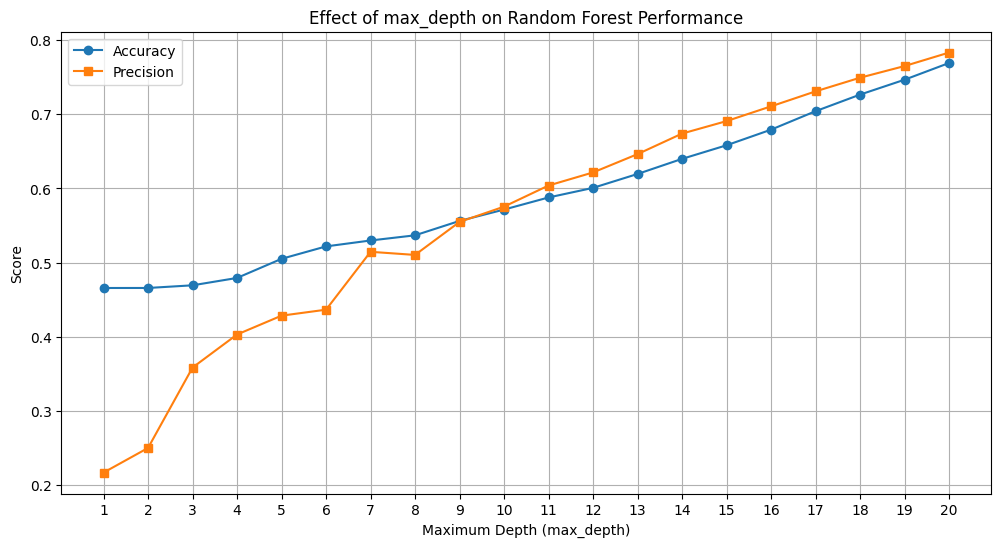

In [7]:
# Evaluation of max_depth

X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split (ensure you have X and y prepared)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prepare to store results
max_depth_range = range(1, 21)  # Testing depths from 1 to 20
accuracy_results_depth = []
precision_results_depth = []

# Loop over the different values of max_depth
for max_depth in max_depth_range:
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Append results
    accuracy_results_depth.append(accuracy)
    precision_results_depth.append(precision)

# Plot the results for max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, accuracy_results_depth, label='Accuracy', marker='o')
plt.plot(max_depth_range, precision_results_depth, label='Precision', marker='s')
plt.title('Effect of max_depth on Random Forest Performance')
plt.xlabel('Maximum Depth (max_depth)')
plt.ylabel('Score')
plt.xticks(max_depth_range)
plt.legend()
plt.grid()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


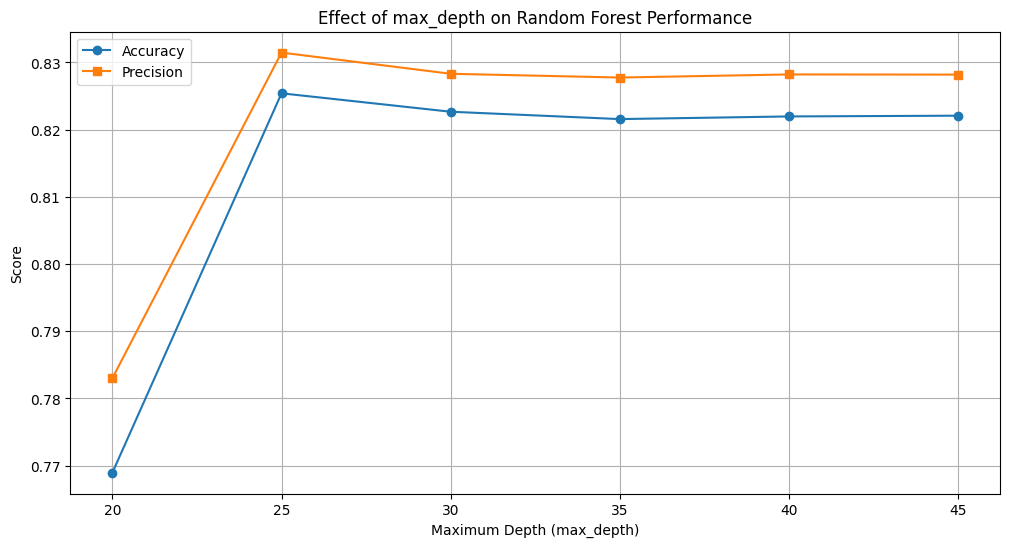

In [9]:
# Evaluation of max_depth

X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split (ensure you have X and y prepared)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prepare to store results
max_depth_range = range(20, 50, 5)  # Testing depths from 20 to 50
accuracy_results_depth = []
precision_results_depth = []

# Loop over the different values of max_depth
for max_depth in max_depth_range:
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Append results
    accuracy_results_depth.append(accuracy)
    precision_results_depth.append(precision)

# Plot the results for max_depth
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, accuracy_results_depth, label='Accuracy', marker='o')
plt.plot(max_depth_range, precision_results_depth, label='Precision', marker='s')
plt.title('Effect of max_depth on Random Forest Performance')
plt.xlabel('Maximum Depth (max_depth)')
plt.ylabel('Score')
plt.xticks(max_depth_range)
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

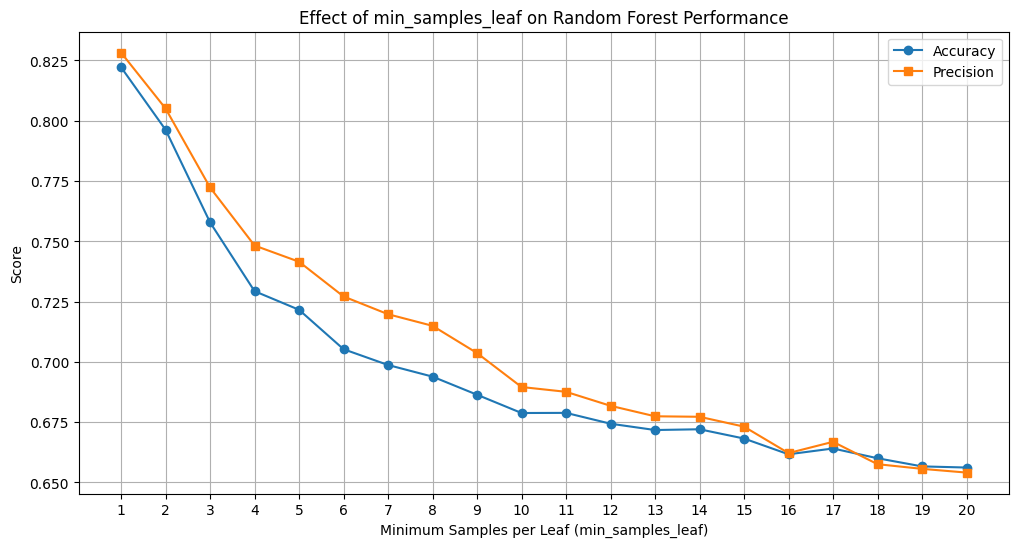

In [8]:
# Evaluation of min_samples_leaf

X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split (ensure you have X and y prepared)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Prepare to store results
min_samples_leaf_range = range(1, 21)  # Testing leaf sizes from 1 to 20
accuracy_results_leaf = []
precision_results_leaf = []

# Loop over the different values of min_samples_leaf
for min_samples_leaf in min_samples_leaf_range:
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Append results
    accuracy_results_leaf.append(accuracy)
    precision_results_leaf.append(precision)

# Plot the results for min_samples_leaf
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leaf_range, accuracy_results_leaf, label='Accuracy', marker='o')
plt.plot(min_samples_leaf_range, precision_results_leaf, label='Precision', marker='s')
plt.title('Effect of min_samples_leaf on Random Forest Performance')
plt.xlabel('Minimum Samples per Leaf (min_samples_leaf)')
plt.ylabel('Score')
plt.xticks(min_samples_leaf_range)
plt.legend()
plt.grid()
plt.show()


let's rerun the code with the hyperparamter<br><br>
n_estimator = 100
maximum_depth = 25
minimum_samples_per_leaf = 1

In [11]:
# Prepare your feature set (X) and labels (y)
X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]     # The last column (hand class)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution in the training set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

# Initialize and fit the Random Forest model
model1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=25, min_samples_leaf=1)
model1.fit(X_train, y_train)

# Optional: Check the representation of each hand class in the training set
print("Number of samples per class in the training set:")
print(y_train.value_counts())

y_pred = model1.predict(X_test)
print(f"Accuracy: {model1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Training set class distribution:
0
0    0.465680
1    0.392549
2    0.088493
3    0.039248
4    0.007219
5    0.003709
6    0.002646
7    0.000427
8    0.000022
9    0.000006
Name: proportion, dtype: float64
Number of samples per class in the training set:
0
0    400966
1    337998
2     76195
3     33794
4      6216
5      3194
6      2278
7       368
8        19
9         5
Name: count, dtype: int64
Accuracy: 0.8254056740949275
              precision    recall  f1-score   support

           0       0.79      0.92      0.85    100242
           1       0.82      0.71      0.76     84500
           2       0.97      0.82      0.89     19049
           3       0.99      0.83      0.90      8448
           4       0.99      0.73      0.84      1554
           5       1.00      0.84      0.92       798
           6       1.00      0.75      0.85       570
           7       1.00      0.78      0.88        92
           8       1.00      1.00      1.00         5
           9       1.00  

Let's do a grid search to look for the best repartition of training/testing data

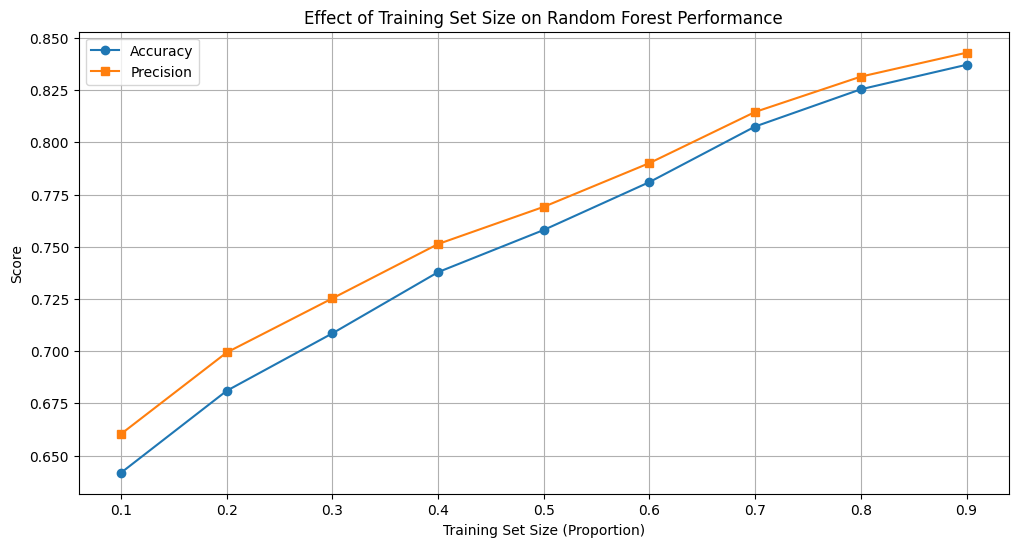

In [12]:
# Prepare your feature set (X) and labels (y)
X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]   # The last column (hand class)

# List of training sizes (proportion of the dataset to use for training)
train_sizes = np.linspace(0.1, 0.9, 9)  # Test with training sizes from 10% to 90%

accuracy_results = []
precision_results = []

for train_size in train_sizes:
    # Split the data with varying training set sizes
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1-train_size, random_state=42, stratify=y
    )
    
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=25, min_samples_leaf=1)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Append results
    accuracy_results.append(accuracy)
    precision_results.append(precision)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracy_results, label='Accuracy', marker='o')
plt.plot(train_sizes, precision_results, label='Precision', marker='s')
plt.title('Effect of Training Set Size on Random Forest Performance')
plt.xlabel('Training Set Size (Proportion)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

it still grows, let's see what happens between 0.9 and 0.99

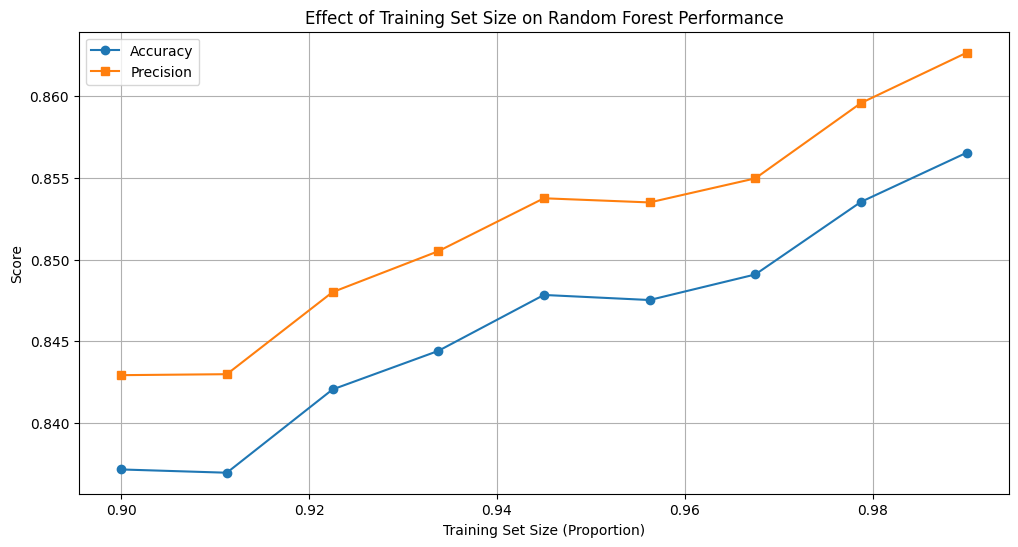

In [13]:
# Prepare your feature set (X) and labels (y)
X = new_training_data.iloc[:, :-1]  # All columns except the last one
y = new_training_data.iloc[:, -1]   # The last column (hand class)

# List of training sizes (proportion of the dataset to use for training)
train_sizes = np.linspace(0.9, 0.99, 9)  # Test with training sizes from 10% to 90%

accuracy_results = []
precision_results = []

for train_size in train_sizes:
    # Split the data with varying training set sizes
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1-train_size, random_state=42, stratify=y
    )
    
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=25, min_samples_leaf=1)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # Append results
    accuracy_results.append(accuracy)
    precision_results.append(precision)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, accuracy_results, label='Accuracy', marker='o')
plt.plot(train_sizes, precision_results, label='Precision', marker='s')
plt.title('Effect of Training Set Size on Random Forest Performance')
plt.xlabel('Training Set Size (Proportion)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

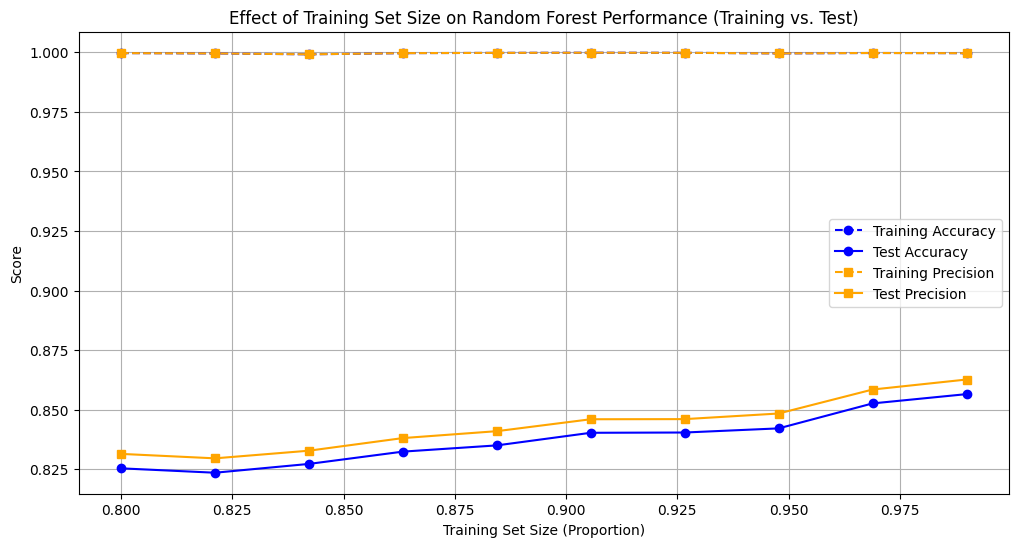

In [14]:
# List of training sizes (proportion of the dataset to use for training)
train_sizes = np.linspace(0.80, 0.99, 10)  # Test with training sizes from 80% to 99%, step of 0.02

accuracy_results_train = []
precision_results_train = []
accuracy_results_test = []
precision_results_test = []

for train_size in train_sizes:
    # Split the data with varying training set sizes
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1-train_size, random_state=42, stratify=y
    )
    
    # Initialize and fit the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=25, min_samples_leaf=1)
    model.fit(X_train, y_train)
    
    # Predictions for both training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate accuracy and precision for the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    
    # Calculate accuracy and precision for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    
    # Append results for training and test sets
    accuracy_results_train.append(accuracy_train)
    precision_results_train.append(precision_train)
    accuracy_results_test.append(accuracy_test)
    precision_results_test.append(precision_test)

# Plot the results for training and test sets
plt.figure(figsize=(12, 6))

# Accuracy
plt.plot(train_sizes, accuracy_results_train, label='Training Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(train_sizes, accuracy_results_test, label='Test Accuracy', marker='o', color='blue')

# Precision
plt.plot(train_sizes, precision_results_train, label='Training Precision', marker='s', linestyle='--', color='orange')
plt.plot(train_sizes, precision_results_test, label='Test Precision', marker='s', color='orange')

plt.title('Effect of Training Set Size on Random Forest Performance (Training vs. Test)')
plt.xlabel('Training Set Size (Proportion)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


Let's try to run the code with 100% of the training set and we'll use the testing set to test

In [8]:
X_test.columns = X_train.columns
print(X_train.dtypes)
print(X_test.dtypes)

# Prepare your feature set (X) and labels (y)
X_train = new_training_data.iloc[:, :-1]  # All columns except the last one
y_train = new_training_data.iloc[:, -1]     # The last column (hand class)
X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

# Check class distribution in the training set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

# Initialize and fit the Random Forest model
model1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=25, min_samples_leaf=1)
model1.fit(X_train, y_train)

# Optional: Check the representation of each hand class in the training set
print("Number of samples per class in the training set:")
print(y_train.value_counts())

y_pred = model1.predict(X_test)
print(f"Accuracy: {model1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

1      int64
1.1    int64
1.2    int64
13     int64
2      int64
4      int64
2.1    int64
3      int64
1.3    int64
12     int64
dtype: object
1      int64
1.1    int64
1.2    int64
13     int64
2      int64
4      int64
2.1    int64
3      int64
1.3    int64
12     int64
dtype: object
Training set class distribution:
0
0    0.465680
1    0.392550
2    0.088493
3    0.039248
4    0.007219
5    0.003709
6    0.002646
7    0.000427
8    0.000022
9    0.000006
Name: proportion, dtype: float64


KeyboardInterrupt: 

Randomforest is working very well, if we had a testing set of all possible hand of poker would we have a precision of 1 ? This is what we'll test now.